# Credit Card Fraud Detection

![credit card pic](https://www.xenonstack.com/wp-content/uploads/xenonstack-credit-card-fraud-detection.png)
- Credit card companies are able to **recognize fraudulent** credit card transactions so that customers are **not charged** for items that they did **not purchase**.
- Problem Type: **Classification**
- Library Used: **TensorFlow, Sklearn, Keras**

In [4]:


# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

print(tf.__version__)

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.5.0-py2.py3-none-any.whl (83 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: werkzeug
   

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


2.11.0


## Importing Data from CSV

In [6]:
data = pd.read_csv("creditcard.csv")

## Exploring the Dataset
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions
* features V1 - V28 are a result of the PCA transformation and are simply numerical representations.
* Amount is the value in dollars of the transaction
* Time variable is the amount of time that passed from the time when the first transaction took place.
* Fraud = 1 , Not Fraud = 0

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# checking for any null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# splitting fraud and non-fraud rows
non_fraud_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

In [12]:
non_fraud_data.shape, fraud_data.shape

((284315, 31), (492, 31))

In [13]:
non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])

non_fraud_data_sample.shape

(492, 31)

In [15]:
# balance dataset: rows 492(fraud) + 492 (non-fraud)
bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True) 
bal_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,46331.0,1.267891,-0.496823,1.323935,0.663002,-1.450780,-0.154108,-0.956530,0.058380,-0.203225,...,-0.422313,-0.521626,0.075885,0.347452,0.314332,-0.407764,0.100802,0.043232,7.56,0
980,42973.0,-1.597403,0.386341,1.213110,1.377145,0.344764,-0.107751,0.112508,0.261858,0.134429,...,-0.123974,0.231513,-0.549898,0.236204,-0.283803,-0.312117,0.147444,-0.510250,20.61,0
981,145152.0,-0.311897,0.378300,1.132216,-1.044578,0.262066,-0.082376,0.332357,0.146162,0.878447,...,0.245414,0.818030,-0.277877,-0.784000,-0.332227,-0.330732,0.198512,0.183156,9.99,0
982,57637.0,1.196738,-1.056625,0.869313,-0.539670,-1.458759,-0.187659,-0.996145,0.006905,-0.123068,...,0.205480,0.428463,-0.167111,-0.075221,0.371516,-0.168129,0.032109,0.041052,110.00,0


In [16]:
bal_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

## Splitting Features and labels
* Features = Time, v1, v2 ....
* Label/Target = Class

In [17]:
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

In [18]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.25,random_state=41,stratify = labels)

In [19]:
features_train.shape, features_test.shape

((738, 30), (246, 30))

In [20]:
labels_test.value_counts()
features_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
234,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.388885,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79
141,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00
871,37915.0,1.447757,-1.044060,0.223792,-1.378274,-1.357806,-0.762301,-0.832304,-0.071479,-1.808722,...,-0.440264,-0.627230,-1.595979,0.325747,-0.066839,-0.051862,-0.607789,0.019450,0.020693,32.00
143,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00
65,26863.0,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,1.602439,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99


## Scaling the Database

In [21]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

## Reshaping the database into 3D
* We are using CNN for prediction so converting 2D dataset into 3D

In [22]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

In [23]:
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1],1)

features_train.shape, features_test.shape

((738, 30, 1), (246, 30, 1))

## Build CNN (Convolutional Neural Network)

In [24]:
# defining the hyperparameter
epochs = 45
model = Sequential()

# FIRST LAYER
model.add(Conv1D(32,2,activation = 'relu',input_shape = features_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks 
   that standardizes the inputs to a layer for each mini-batch. This 
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(64,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification 


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [27]:
# optimizing the model 
model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [28]:
# Training the model, Calculating the accuracy 
history = model.fit(features_train, labels_train, epochs = epochs,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/45
24/24 [==============================] - 2s 20ms/step - loss: 0.7660 - accuracy: 0.6260 - val_loss: 0.6198 - val_accuracy: 0.9024
Epoch 2/45
24/24 [==============================] - 0s 10ms/step - loss: 0.4706 - accuracy: 0.7995 - val_loss: 0.5711 - val_accuracy: 0.9228
Epoch 3/45
24/24 [==============================] - 0s 9ms/step - loss: 0.4032 - accuracy: 0.8388 - val_loss: 0.5408 - val_accuracy: 0.8902
Epoch 4/45
24/24 [==============================] - 0s 7ms/step - loss: 0.3624 - accuracy: 0.8780 - val_loss: 0.5107 - val_accuracy: 0.8374
Epoch 5/45
24/24 [==============================] - 0s 7ms/step - loss: 0.3394 - accuracy: 0.8753 - val_loss: 0.4892 - val_accuracy: 0.7886
Epoch 6/45
24/24 [==============================] - 0s 7ms/step - loss: 0.3054 - accuracy: 0.8862 - val_loss: 0.4600 - val_accuracy: 0.8130
Epoch 7/45
24/24 [==============================] - 0s 8ms/step - loss: 0.3019 - accuracy: 0.9011 - val_loss: 0.4392 - val_accuracy: 0.8130
Epoch 8/45
24/24 [

## Plotting a Learning Curve

In [39]:
def plot_learning_curve(history,epochs):
    
    # plot training and validation accuracy 
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    # plot training and validation loss
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

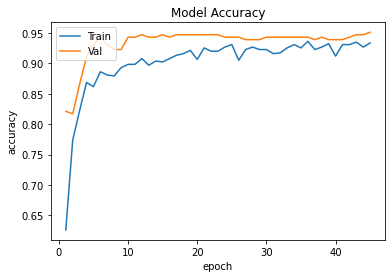

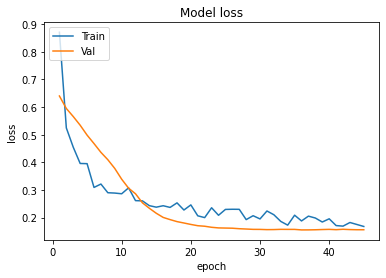

In [25]:
plot_learning_curve(history,epochs)

## Adding MaxPool

#### **Pooling layers** are used to **reduce the dimensions** of the feature maps. Thus, it **reduces** the number of **parameters** to learn and the amount of **computation** performed in the network.

In [31]:
# defining the hyperparameter
epochs = 100
model = Sequential()

# FIRST LAYER
model.add(Conv1D(64,2,activation = 'relu',input_shape = features_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks 
   that standardizes the inputs to a layer for each mini-batch. This 
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(MaxPool1D(2))
'''Max pooling is done to in part to help over-fitting by providing an abstracted form of the
   representation. As well, it reduces the computational cost by reducing the 
   number of parameters to learn and provides basic translation invariance to 
   the internal representation.'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(128,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification 

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 64)            192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 64)            256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 128)           16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 128)           

In [34]:
# optimizing the model 
model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

# Training the model, Calculating the accuracy 
history = model.fit(features_train, labels_train, epochs = epochs,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/100
24/24 [==============================] - 2s 14ms/step - loss: 0.0466 - accuracy: 0.9797 - val_loss: 0.1877 - val_accuracy: 0.9472
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.9878 - val_loss: 0.1886 - val_accuracy: 0.9431
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0568 - accuracy: 0.9756 - val_loss: 0.1905 - val_accuracy: 0.9431
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.1912 - val_accuracy: 0.9431
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9905 - val_loss: 0.1891 - val_accuracy: 0.9431
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9837 - val_loss: 0.1885 - val_accuracy: 0.9431
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9824 - val_loss: 0.1903 - val_accuracy: 0.9431
Epoch 8/100


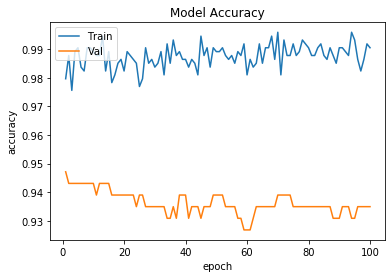

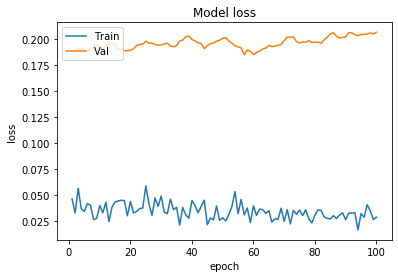

In [35]:
# plotting learning curve (MAX POOL)
plot_learning_curve(history,epochs)

## Predicting

In [36]:
final_acc = model.evaluate(features_train,labels_train)
final_acc

24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000


[0.006120568141341209, 1.0]

In [37]:
pred = model.predict(features_test)
pred_label = pred.argmax(axis=1)

8/8 [==============================] - 0s 2ms/step


In [38]:
cm =confusion_matrix(labels_test,pred.round())
cm

array([[118,   5],
       [ 11, 112]], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already defined and compiled your 'model'

# Calculate and print accuracy
final_acc = model.evaluate(features_train, labels_train)
print(f"Accuracy: {final_acc[1]:.2f}")

# Predict labels for the test set
pred = model.predict(features_test)
pred_label = (pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate and print classification report (includes precision, recall, and F1 score)
report = classification_report(labels_test, pred_label)
print(f"Classification report:\n{report}")

# Calculate and print confusion matrix
cm = confusion_matrix(labels_test, pred_label)
print("Confusion Matrix:")
print(cm)

# Extract TP, TN, FP, FN values from the confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Accuracy: 1.00
8/8 [==============================] - 0s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       123
           1       0.96      0.91      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Confusion Matrix:
[[118   5]
 [ 11 112]]
True Positives (TP): 112
True Negatives (TN): 118
False Positives (FP): 5
False Negatives (FN): 11


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already defined and compiled your 'model'

# Calculate and print accuracy
final_acc = model.evaluate(features_train, labels_train)
print(f"Accuracy: {final_acc[1]:.2f}")

# Predict labels for the test set
pred = model.predict(features_test)
pred_label = (pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate and print classification report (includes precision, recall, and F1 score)
report = classification_report(labels_test, pred_label, target_names=['Normal', 'Fraud'])
print(f"Classification report:\n{report}")

# Extracting precision, recall, and F1 score from the classification report
precision, recall, f1, _ = report.split('\n')[2].split()[1:]
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


24/24 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Accuracy: 1.00
8/8 [==============================] - 0s 3ms/step
Classification report:
              precision    recall  f1-score   support

      Normal       0.91      0.96      0.94       123
       Fraud       0.96      0.91      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Precision: 0.91
Recall: 0.96
F1 Score: 0.94


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have already defined and compiled your 'model'

# Calculate and print accuracy
final_acc = model.evaluate(features_train, labels_train)
print(f"Accuracy: {final_acc[1]:.2f}")

# Predict labels for the test set
pred = model.predict(features_test)
pred_label = (pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate and print classification report (includes precision, recall, and F1 score)
report = classification_report(labels_test, pred_label, target_names=['Normal', 'Fraud'])
print(f"Classification report:\n{report}")

# Extracting precision, recall, and F1 score from the classification report
precision, recall, f1, _ = report.split('\n')[2].split()[1:]
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Accuracy: 1.00
8/8 [==============================] - 0s 2ms/step
Classification report:
              precision    recall  f1-score   support

      Normal       0.91      0.96      0.94       123
       Fraud       0.96      0.91      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Precision: 0.91
Recall: 0.96
F1 Score: 0.94
